In [1]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import os, sys
from pprint import pprint
sys.path.extend(('../reframe', '..')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

In [2]:
# NB: this is based on paths looking like:
# ../output/alaska/compute-roce/gnu-openmpi/IMB_PingPong/rfm_IMB_PingPong_job.out 
# ../perflogs/alaska/compute-roce/gnu-openmpi/IMB_PingPong/IMB_PingPong.log

loaded 20 performance records
   sysname          partition environ       testname           filename  \
0   alaska  roce-openmpi4-ucx     omb  Osu_mbw_mr_16  Osu_mbw_mr_16.log   
1   alaska  roce-openmpi4-ucx     omb  Osu_mbw_mr_16  Osu_mbw_mr_16.log   
2   alaska  roce-openmpi4-ucx     omb   Osu_mbw_mr_4   Osu_mbw_mr_4.log   
3   alaska  roce-openmpi4-ucx     omb   Osu_mbw_mr_4   Osu_mbw_mr_4.log   
4   alaska  roce-openmpi4-ucx     omb  Osu_mbw_mr_32  Osu_mbw_mr_32.log   
5   alaska  roce-openmpi4-ucx     omb  Osu_mbw_mr_32  Osu_mbw_mr_32.log   
6   alaska  roce-openmpi4-ucx     omb   Osu_mbw_mr_8   Osu_mbw_mr_8.log   
7   alaska  roce-openmpi4-ucx     omb   Osu_mbw_mr_8   Osu_mbw_mr_8.log   
8   alaska  roce-openmpi4-ucx     omb   Osu_mbw_mr_2   Osu_mbw_mr_2.log   
9   alaska  roce-openmpi4-ucx     omb   Osu_mbw_mr_2   Osu_mbw_mr_2.log   
10  alaska    ib-openmpi4-ucx     omb  Osu_mbw_mr_16  Osu_mbw_mr_16.log   
11  alaska    ib-openmpi4-ucx     omb  Osu_mbw_mr_16  Osu_mbw_mr_16.lo

loaded 20 performance records


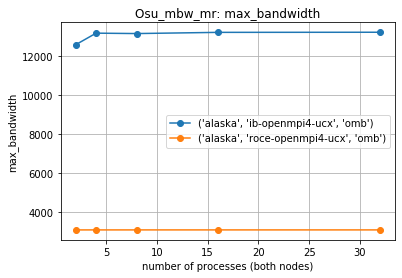

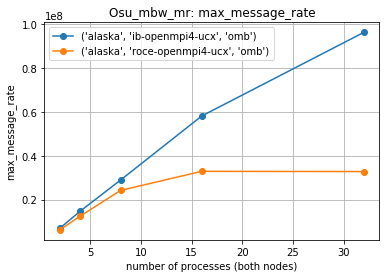

In [14]:
# Plot comparisons across number of processes-per-node for most-recent test per system/partition/environment:
# For osu_mbw_mr, plot performance vs number of processes for most-recent tests:

# Load performance records:
perf_records = modules.utils.load_perf_logs('../perflogs', 'Osu_mbw_mr', '.log')
print('loaded %s performance records' % len(perf_records))

# Plot layout:
#   perf-var:
#    xs: n_cores, ys: value, series: system-partition-environment
for perf_var, data in perf_records.groupby('perf_var'):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    for spe, data in data.groupby(['sysname', 'partition', 'environ']):
        xs = []
        ys = []
        for test, data in data.groupby('testname'): # NB this won't iterate in number-of-cores order!
            n_procs = int(test.rsplit('_')[-1]) # TODO: be better if we could get this into the perflog tbh
            xs.append(n_procs)
            last_test = data.iloc[-1] # as we know performance logs go forward thro history
            ys.append(last_test['perf_value'])
        # now sort by number of processes:
        xs, ys = zip(*sorted(zip(xs, ys), key=lambda xy: xy[0]))
        plt.plot(xs, ys, 'o-', label=spe)
    ax.set_title('Osu_mbw_mr: %s' % perf_var)
    ax.legend()
    ax.grid(True)
    ax.set_xlabel('number of processes (both nodes)')
    ax.set_ylabel(perf_var)
        

In [15]:
# # find and load output files:
# run_outputs = modules.utils.find_run_outputs('../output', 'Osu_')
# print(run_outputs)

# # load results using the same function that we use for reframe performance tests:
# results = []
# for path in run_outputs:
#     result = modules.omb.read_omb_out(path)
#     results.append(result)
# print('results:')
# for r in results:
#     print(r)
    
# # # Group results by *testname*
# # test_results = modules.utils.group_by(results, lambda x: x['meta']['testname'])

# # print('loaded %s output files from %i tests' % (len(results), len(test_results)))
# # for test, cases in test_results.items():
# #     print(test, ':')
# #     for c in cases:
# #         print('  ', c['meta']['path'])
# # #         print('    ',c['meta']['environ'])
# # #         print('    ',c['meta']['partition'])

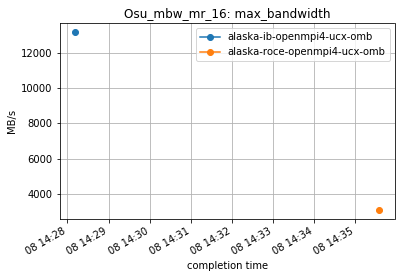

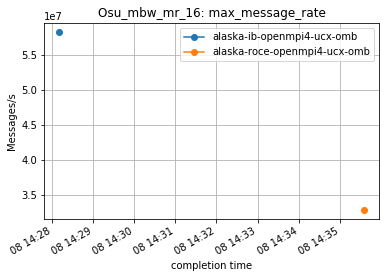

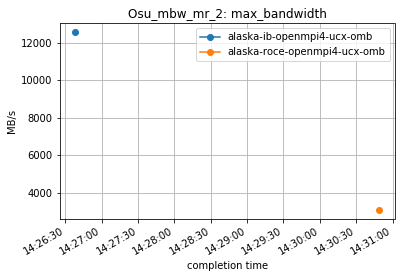

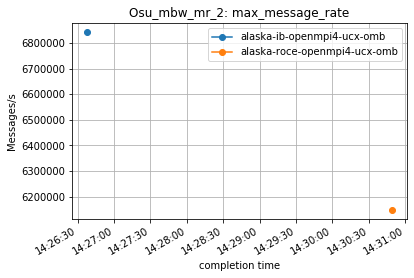

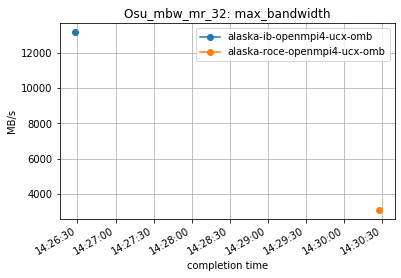

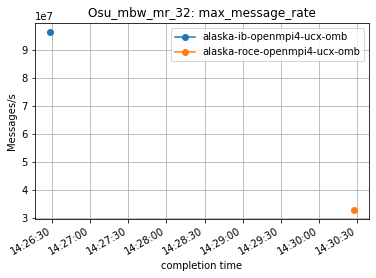

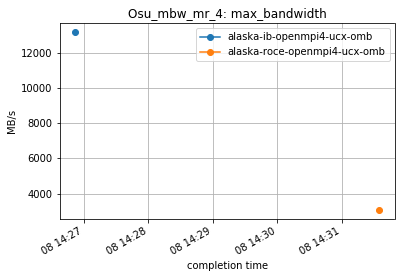

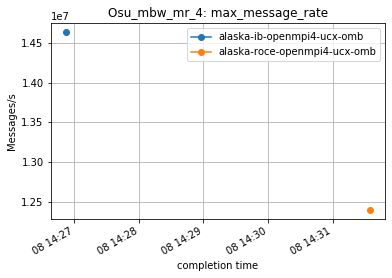

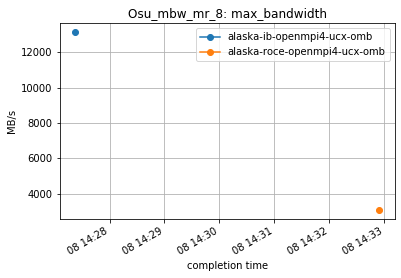

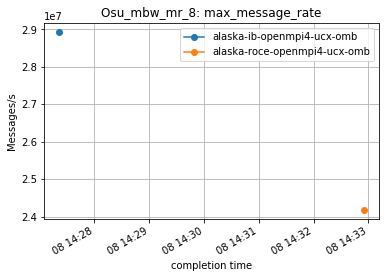

In [16]:
# Plot performance history:
modules.plots.plot_perf_history(perf_records)

In [5]:
# example of loading test objects - don't actually need this yet

# def get_tests(module):
#     tests = []
#     for name in dir(module):
#         obj = getattr(module, name)
#         if isinstance(obj, reframe.core.meta.RegressionTestMeta):
#             tests.append(obj)
#     return tests
# testobjs = get_tests(reframe_imb)
# print(testobjs)

In [6]:
# Load performance records
perf_records = modules.utils.load_perf_logs('../perflogs', 'IMB', '.log')
perf_records.reindex()
print('loaded %s performance records' % len(perf_records))
print(perf_records.index)

loaded 17 performance records
RangeIndex(start=0, stop=17, step=1)


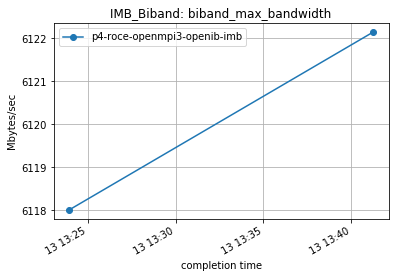

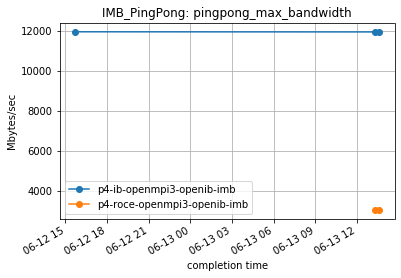

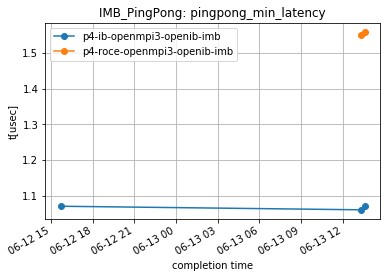

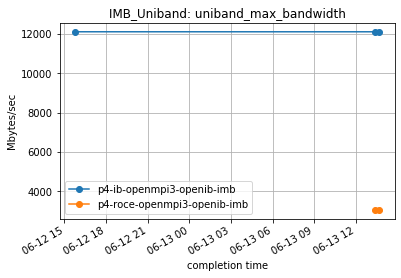

In [7]:
# Plot performance history:
modules.plots.plot_perf_history(perf_records)